# Student Details

<b>Student ID:</b> 2019HT13084<br>
<b> Name:</b>      Raghul V

# Loan Prediction

### Problem

A Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a data set.

### Data

Variable Descriptions:

<table style="width:40%">
<tr>
    <th>Variable</th>
    <th>Description</th>
</tr>
<tr>
    <td>Loan_ID</td>
    <td>Unique Loan ID</td>
    </tr>
    <tr>
        <td>Gender
        <td>Male/ Female</td>
    </tr>
    <tr>
        <td>Married</td>
        <td>Applicant married (Y/N)</td>
    </tr>
    <tr>
        <td>Dependents</td>
        <td>Number of dependents</td>
    </tr>
    <tr>
        <td>Education</td>	
        <td>Applicant Education (Graduate/ Under Graduate)</td>
    </tr>
    <tr>
        <td>Self_Employed</td>
        <td>Self employed (Y/N)</td>
    </tr>
    <tr>
        <td>ApplicantIncome</td>
        <td>Applicant income</td>
    </tr>
    <tr>
        <td>CoapplicantIncome</td>
        <td>Coapplicant income</td>
            </tr>
    <tr>
        <td>LoanAmount</td>
        <td>Loan amount in thousands</td>
            </tr>
    <tr>
        <td>Loan_Amount_Term</td>
        <td>Term of loan in months</td>
            </tr>
    <tr>
        <td>Credit_History</td>
        <td>credit history meets guidelines</td>
            </tr>
    <tr>
        <td>Property_Area</td>
        <td>Urban/ Semi Urban/ Rural</td>
    </tr>
    <tr>
        <td>Loan_Status</td>
        <td>Loan approved (Y/N)</td>
            </tr>
    <tr>

# Import Modules

In [259]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the dataset

In [260]:
df = pd.read_csv('Assignment 1/Assignment 4/LoanApplicantData.csv')

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [262]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [263]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


There are few missing values in LoanAmount, Loan_Amount_Term and Credit_History

# Data Preprocessing

In [264]:
#finding the null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [265]:
# filling the missing values of numerical columns
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

Used mean method to fill the missing values of numerical coulmns.

In [266]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [267]:
# finding the mode value of Categorical columns
mod = df['Gender'].mode()[0]
print("Mode value of Gender Column:",mod)
mod1 = df['Married'].mode()[0]
print("Mode value of Married Column:",mod1)
mod2 = df['Dependents'].mode()[0]
print("Mode value of Dependents Column:",mod2)
mod3 = df['Self_Employed'].mode()[0]
print("Mode value of Self_Employed Column:",mod3)

Mode value of Gender Column: Male
Mode value of Married Column: Yes
Mode value of Dependents Column: 0
Mode value of Self_Employed Column: No


In [268]:
# filling the missing values of categorical columns using mode value
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

Used the mode value to fill the missing values of categorical columns

In [269]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Missing values of all the columns in the dataset were taken care and filled.

# Exploratory Data Analysis

In [270]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
print(categorical_columns)
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
print(numerical_columns)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


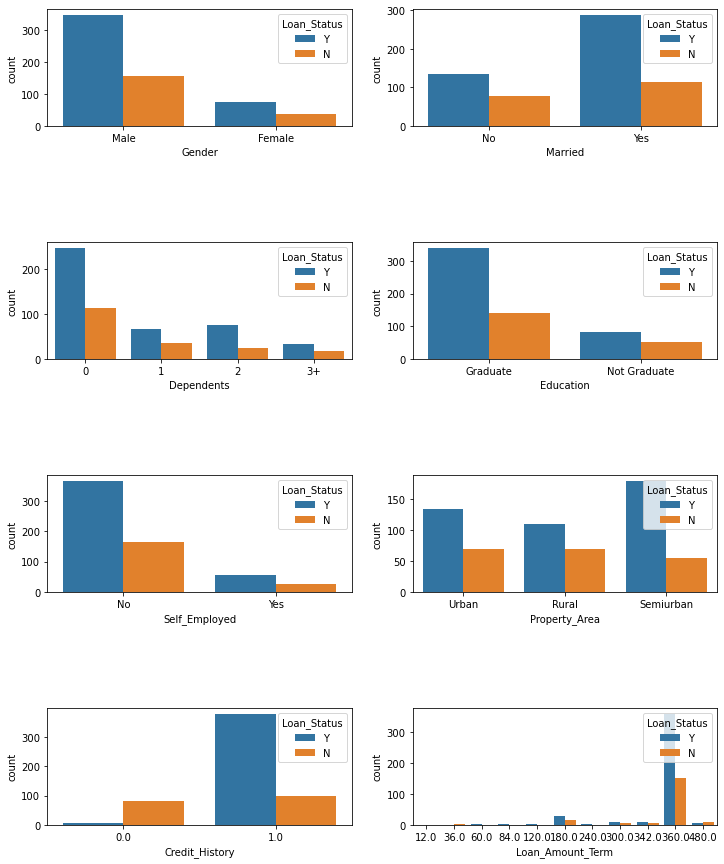

In [271]:
# Analysing categorical columns
fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=df,hue='Loan_Status',ax=axes[row,col])
plt.subplots_adjust(hspace=1)

<b>Plots above convey following things about the dataset:</b>

Loan Approval Status: About 2/3rd of applicants have been granted loan.<br>
Sex: There are more Men than Women (approx. 3x)<br>
Martial Status: 2/3rd of the population in the dataset is Marred; Married applicants are more likely to be granted loans.<br>
Dependents: Majority of the population have zero dependents and are also likely to accepted for loan.<br>
Education: About 5/6th of the population is Graduate and graduates have higher propotion of loan approval<br>
Employment: 5/6th of population is not self employed.<br>
Property Area: More applicants from Semi-urban and also likely to be granted loans.<br>
Applicant with credit history are far more likely to be accepted.<br>
Loan Amount Term: Majority of the loans taken are for 360 Months (30 years).<br>

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000         614.000000  614.000000
mean       5403.459283        1621.245798  146.412162
std        6109.041673        2926.248369   84.037468
min         150.000000           0.000000    9.000000
25%        2877.500000           0.000000  100.250000
50%        3812.500000        1188.500000  129.000000
75%        5795.000000        2297.250000  164.750000
max       81000.000000       41667.000000  700.000000


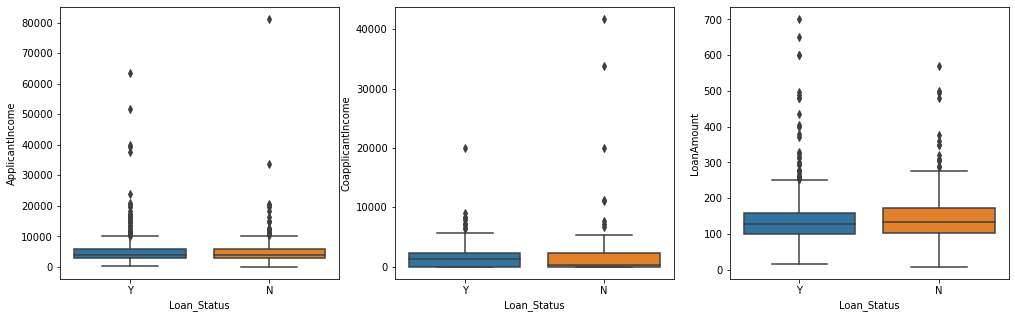

In [272]:
# Analysing numerical columns
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=df,x='Loan_Status',ax=axes[idx])
print(df[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

The above Box Plot shows the presence of a lot of outliers/extreme values.

# Creation of new attributes

In [273]:
# Add both ApplicantIncome and CoapplicantIncome to TotalIncome
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


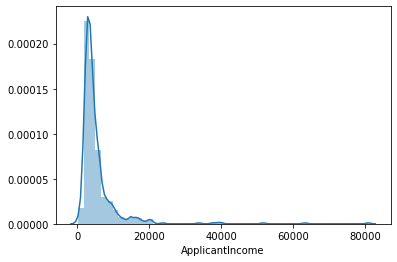

In [274]:
#numerical attributes visualization
sns.distplot(df["ApplicantIncome"])

ApplicantIncome attributes has lots of outliers/extreme values. To normalize the attribute we are applying log transformation

In [275]:
# Applying log transformation to ApplicantIncome atrribute
df['ApplicantIncome_Log'] = np.log(df['ApplicantIncome'])

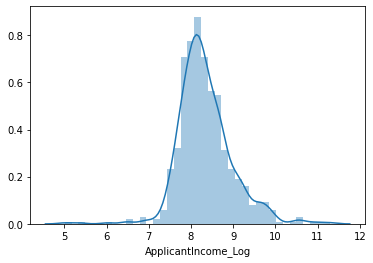

In [276]:
sns.distplot(df["ApplicantIncome_Log"])

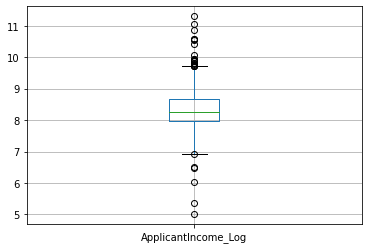

In [277]:
df.boxplot(column='ApplicantIncome_Log')

With the log transformation, the curve becomes bell shaped.

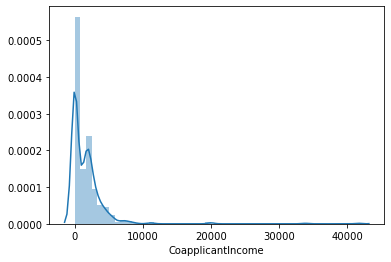

In [278]:
sns.distplot(df["CoapplicantIncome"])

No need normalize CoapplicantIncome attribute as it is not impacting the loan status and also we have created TotalIncome attribute and normalized.

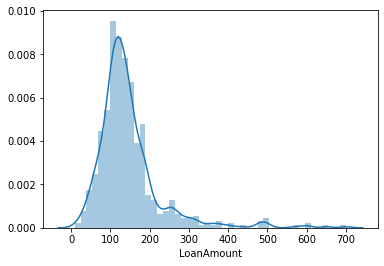

In [279]:
sns.distplot(df["LoanAmount"])

In [280]:
# Applying log transformation to LoanAmount atrribute
df['LoanAmount_Log'] = np.log(df['LoanAmount'])

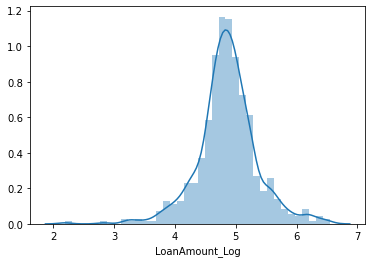

In [281]:
sns.distplot(df["LoanAmount_Log"])

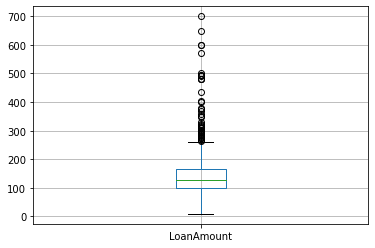

In [282]:
df.boxplot(column='LoanAmount')

LoanAmount attribute also has been normalized

In [283]:
# Applying log transformation to TotalIncome atrribute
df['TotalIncome_Log'] = np.log(df['TotalIncome'])

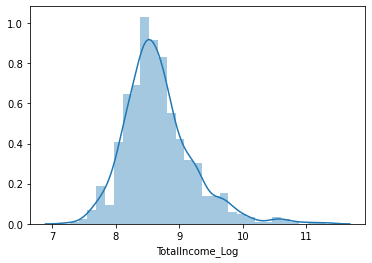

In [284]:
sns.distplot(df["TotalIncome_Log"])

TotalIncome attribute also been normalized.

In [285]:
# Loan approval rates in absolute numbers
loan_approval = df['Loan_Status'].value_counts()['Y']
print(loan_approval,"loans were approved")

422 loans were approved


In [286]:
# Credit History and Loan Status
pd.crosstab(df['Credit_History'], df['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [287]:
pd.crosstab(df['Credit_History'], df['Loan_Status'], margins=True).apply(lambda r: r/r.sum(), axis=1)

Loan_Status,N,Y,All
Credit_History,,,
0.0,0.460674,0.039326,0.5
1.0,0.102105,0.397895,0.5
All,0.158688,0.341312,0.5


79.58 % of the applicants whose loans were approved have Credit_History equals to 1.

In [288]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,ApplicantIncome_Log,LoanAmount_Log,TotalIncome_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674026,4.986426,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430109,4.852030,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006368,4.189655,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.856707,4.787492,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699515,4.948760,8.699515


## Coorelation Matrix

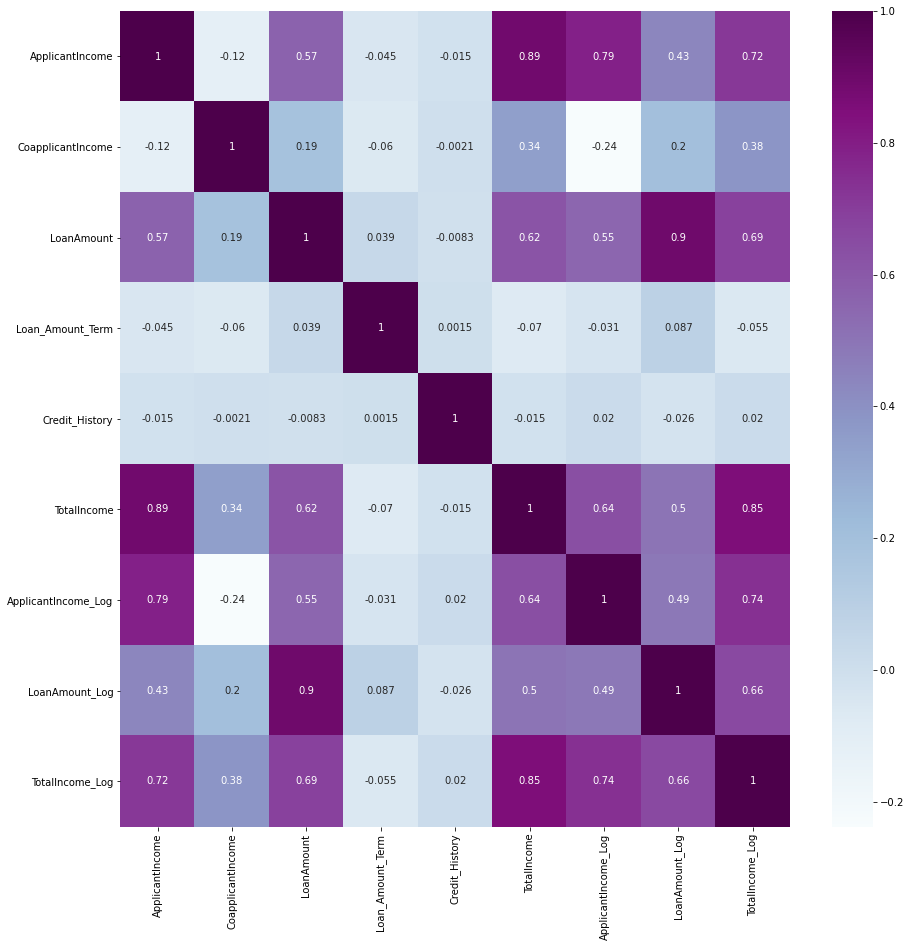

In [289]:
corr = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot = True, cmap="BuPu")

We can remove the highly coorelated attributes

In [290]:
# drop unnecessary columns
cols= ['ApplicantIncome', 'CoapplicantIncome','LoanAmount','Loan_Amount_Term', 'TotalIncome', 'Loan_ID']
df = df.drop(columns=cols, axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncome_Log,LoanAmount_Log,TotalIncome_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,4.986426,8.674026
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,4.852030,8.714568
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,4.189655,8.006368
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,4.787492,8.505323
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,4.948760,8.699515


We need to convert the categorical attributes to numerical attributes

### Label Encoding

In [291]:
from sklearn.preprocessing import LabelEncoder
# Convert all non-numeric values to number
cat=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le=LabelEncoder()
for var in cat:
    df[var]=le.fit_transform(df[var].astype('str'))

In [292]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncome_Log,LoanAmount_Log,TotalIncome_Log
0,1,0,0,0,0,1.0,2,1,8.674026,4.986426,8.674026
1,1,1,1,0,0,1.0,0,0,8.430109,4.852030,8.714568
2,1,1,0,0,1,1.0,2,1,8.006368,4.189655,8.006368
3,1,1,0,1,0,1.0,2,1,7.856707,4.787492,8.505323
4,1,0,0,0,0,1.0,2,1,8.699515,4.948760,8.699515


<b> Note: Loan status : 1 -> Yes 2 -> No</b>

# Dataset split-up test/train

In [293]:
# Specifying input and output attributes
x = df.drop(columns=['Loan_Status'],axis=1)
y = df['Loan_Status']

In [294]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [295]:
# filling the NAN with num
x = np.nan_to_num(x)
x_train = np.nan_to_num(x_train)

Splitted the daat set into train -> 75% and test -> 25%

# Training the Model

In [296]:
# classify function
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy:", model.score(x_test, y_test)*100)
    score=cross_val_score(model, x, y, cv=5)
    print("Cross validation:",np.mean(score)*100)

## Model: Logistsic Regression

In [297]:
# from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, x, y)

Accuracy: 75.32467532467533
Cross validation: 76.87591630014661


#### Confusion Matrix

In [300]:
y_train = np.nan_to_num(y_train)
x_test = np.nan_to_num(x_test)
model.fit(x_train, y_train)

LogisticRegression()

In [301]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm= confusion_matrix(y_test, y_pred)
cm

array([[26, 28],
       [10, 90]], dtype=int64)

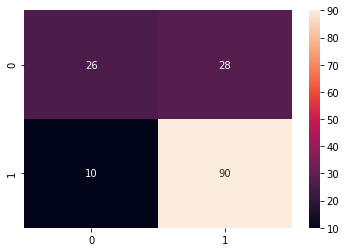

In [302]:
sns.heatmap(cm, annot=True)

## Model: Decision Tree

In [303]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, x, y)

Accuracy: 65.5844155844156
Cross validation: 67.42369718779156


#### Confusion Matrix

In [304]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [305]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm= confusion_matrix(y_test, y_pred)
cm

array([[26, 28],
       [21, 79]], dtype=int64)

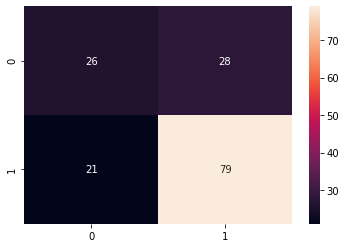

In [306]:
sns.heatmap(cm, annot=True)

<b>Logistic Regression</b> model has higher accuracy compare to Decision Tree in predicting the Loan Status